In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Running TFLite models

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%202%20-%20TensorFlow%20Lite/Week%201/Examples/TFLite_Week1_Linear_Regression.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%202%20-%20TensorFlow%20Lite/Week%201/Examples/TFLite_Week1_Linear_Regression.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

## Setup

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.0.0


## Create a Basic Model of the Form y = mx + c

In [2]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd',
              loss='mean_squared_error')

model.fit(x, y, epochs=200)

Train on 6 samples
Epoch 1/200
6/6 [==============================] - 1s 155ms/sample - loss: 3.0351
Epoch 2/200
6/6 [==============================] - 0s 2ms/sample - loss: 2.5441
Epoch 3/200
6/6 [==============================] - 0s 2ms/sample - loss: 2.1545
Epoch 4/200
6/6 [==============================] - 0s 2ms/sample - loss: 1.8449
Epoch 5/200
6/6 [==============================] - 0s 2ms/sample - loss: 1.5983
Epoch 6/200
6/6 [==============================] - 0s 2ms/sample - loss: 1.4012
Epoch 7/200
6/6 [==============================] - 0s 2ms/sample - loss: 1.2432
Epoch 8/200
6/6 [==============================] - 0s 2ms/sample - loss: 1.1160
Epoch 9/200
6/6 [==============================] - 0s 2ms/sample - loss: 1.0131
Epoch 10/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.9294
Epoch 11/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.8608
Epoch 12/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.8041
Epoch 13/200
6/6

Epoch 93/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1201
Epoch 94/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1176
Epoch 95/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1152
Epoch 96/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1128
Epoch 97/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1105
Epoch 98/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1083
Epoch 99/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1060
Epoch 100/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1039
Epoch 101/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.1017
Epoch 102/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.0996
Epoch 103/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.0976
Epoch 104/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.0956
Epoch 105/200
6/6 [====

Epoch 193/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.0151
Epoch 194/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.0148
Epoch 195/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.0145
Epoch 196/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.0142
Epoch 197/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.0139
Epoch 198/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.0136
Epoch 199/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.0133
Epoch 200/200
6/6 [==============================] - 0s 2ms/sample - loss: 0.0130


## Generate a SavedModel

In [10]:
export_dir = 'saved_model'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model\assets


## Convert the SavedModel to TFLite

In [11]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [12]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

780

## Initialize the TFLite Interpreter To Try It Out

In [13]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()


# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [14]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    # Test the TensorFlow model on random input data.
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

## Visualize the Model

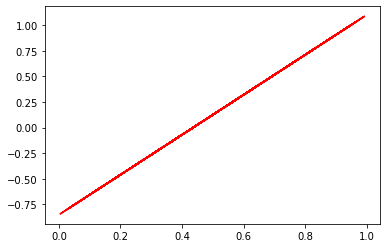

In [15]:
%matplotlib inline

plt.plot(inputs, outputs, 'r')
plt.show()

## Download the TFLite Model File

If you are running this notebook in a Colab, you can run the cell below to download the tflite model to your local disk. 

**Note**: If the file does not download when you run the cell, try running the cell a second time.

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass